#Unzip the data

In [ ]:
!unzip '/content/dataset.zip'

Streaming output truncated to the last 5000 lines.
  inflating: num/train/four/3066.jpg  
  inflating: num/train/four/30676.jpg  
  inflating: num/train/four/30943.jpg  
  inflating: num/train/four/31182.jpg  
  inflating: num/train/four/31395.jpg  
  inflating: num/train/four/3170.jpg  
  inflating: num/train/four/31804.jpg  
  inflating: num/train/four/31929.jpg  
  inflating: num/train/four/31933.jpg  
  inflating: num/train/four/32091.jpg  
  inflating: num/train/four/32164.jpg  
  inflating: num/train/four/32263.jpg  
  inflating: num/train/four/32484.jpg  
  inflating: num/train/four/32507.jpg  
  inflating: num/train/four/32722.jpg  
  inflating: num/train/four/32769.jpg  
  inflating: num/train/four/33001.jpg  
  inflating: num/train/four/33509.jpg  
  inflating: num/train/four/33636.jpg  
  inflating: num/train/four/33739.jpg  
  inflating: num/train/four/33803.jpg  
  inflating: num/train/four/3425.jpg  
  inflating: num/train/four/34375.jpg  
  inflating: num/train/four/3454

#Data Agumentation

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
xtrain = train_datagen.flow_from_directory('/content/dataset/train',
                                           target_size=(64,64),
                                           class_mode='categorical',
                                           batch_size=100)

Found 7557 images belonging to 16 classes.


In [ ]:
xtest = test_datagen.flow_from_directory('/content/dataset/test',
                                           target_size=(64,64),
                                           class_mode='categorical',
                                           batch_size=100)

Found 1010 images belonging to 16 classes.


#CNN Models

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense

In [ ]:
model = Sequential()
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(64,64,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))
model.add(Dense(16,activation='softmax'))


In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

#Train model

In [ ]:
model.fit_generator(xtrain,
                    steps_per_epoch=len(xtrain),
                    epochs=10,
                    validation_data=xtest,
                    validation_steps=len(xtest))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/10
76/76 [==============================] - 20s 158ms/step - loss: 2.1305 - accuracy: 0.3744 - val_loss: 1.4769 - val_accuracy: 0.5386
Epoch 2/10
76/76 [==============================] - 12s 154ms/step - loss: 1.1672 - accuracy: 0.6557 - val_loss: 1.0067 - val_accuracy: 0.6743
Epoch 3/10
76/76 [==============================] - 12s 158ms/step - loss: 0.8870 - accuracy: 0.7266 - val_loss: 0.8381 - val_accuracy: 0.7287
Epoch 4/10
76/76 [==============================] - 12s 153ms/step - loss: 0.7463 - accuracy: 0.7675 - val_loss: 0.7593 - val_accuracy: 0.7564
Epoch 5/10
76/76 [==============================] - 12s 155ms/step - loss: 0.6288 - accuracy: 0.8051 - val_loss: 0.6437 - val_accuracy: 0.7812
Epoch 6/10
76/76 [==============================] - 12s 151ms/step - loss: 0.5477 - accuracy: 0.8325 - val_loss: 0.5691 - val_accuracy: 0.8129
Epoch 7/10
76/76 [==============================] - 12s 154ms/step - loss: 0.4769 - accuracy: 0.8490 - val_loss: 0.4762 - val_accuracy: 0.8485

#Model Tuning

In [ ]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [ ]:
early_stopping = EarlyStopping(monitor='val_accuracy',
                               patience=5)
reduce_lr=ReduceLROnPlateau(monitor='val_accuracy',
                            patience=5,
                            factor=0.5,min_lr=0.00001)
callback=[reduce_lr,early_stopping]

#train model

In [ ]:
model.fit_generator(xtrain,
                    steps_per_epoch=len(xtrain),
                    epochs=10,
                    callbacks=callback,
                    validation_data=xtest,
                    validation_steps=len(xtest))

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


76/76 [==============================] - 12s 157ms/step - loss: 0.3344 - accuracy: 0.8945 - val_loss: 0.4036 - val_accuracy: 0.8624 - lr: 0.0010
Epoch 2/10
76/76 [==============================] - 12s 157ms/step - loss: 0.3216 - accuracy: 0.8981 - val_loss: 0.4542 - val_accuracy: 0.8653 - lr: 0.0010
Epoch 3/10
76/76 [==============================] - 12s 154ms/step - loss: 0.3018 - accuracy: 0.9035 - val_loss: 0.4758 - val_accuracy: 0.8564 - lr: 0.0010
Epoch 4/10
76/76 [==============================] - 12s 155ms/step - loss: 0.2771 - accuracy: 0.9094 - val_loss: 0.4033 - val_accuracy: 0.8812 - lr: 0.0010
Epoch 5/10
76/76 [==============================] - 12s 155ms/step - loss: 0.2465 - accuracy: 0.9229 - val_loss: 0.4903 - val_accuracy: 0.8416 - lr: 0.0010
Epoch 6/10
76/76 [==============================] - 12s 154ms/step - loss: 0.2390 - accuracy: 0.9191 - val_loss: 0.3757 - val_accuracy: 0.8842 - lr: 0.0010
Epoch 7/10
76/76 [==============================] - 12s 155ms/step - loss: 

In [ ]:
model.save('number.h5')

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image

In [ ]:
img = image.load_img('/content/dataset/test/eight/10661.jpg',target_size=(64,64))

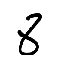

In [ ]:
img

In [ ]:
x = image.img_to_array(img)
x

array([[[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 2

In [ ]:
x=np.expand_dims(x,axis=0)
x

array([[[[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        ...,

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
       

In [ ]:
model.predict(x)

1/1 [==============================] - 0s 15ms/step


array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
      dtype=float32)

In [ ]:
xtrain.class_indices

{'decimal': 0,
 'div': 1,
 'eight': 2,
 'equal': 3,
 'five': 4,
 'four': 5,
 'minus': 6,
 'nine': 7,
 'one': 8,
 'plus': 9,
 'seven': 10,
 'six': 11,
 'three': 12,
 'times': 13,
 'two': 14,
 'zero': 15}

In [ ]:
op=['decimal', 'div', 'eight', 'equal', 'five', 'four','minus', 'nine', 'one', 'plus', 'seven', 'six', 'three', 'times', 'two', 'zero']
pred = np.argmax(model.predict(x))
op[pred]

1/1 [==============================] - 0s 15ms/step


'eight'

#test

In [ ]:
img = image.load_img('/content/dataset/test/minus/141.jpg',target_size=(64,64))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
pred= np.argmax(model.predict(x))
op[pred]

1/1 [==============================] - 0s 16ms/step


'minus'